**1- Dowloading data from kaggle**

In [3]:
#Installing kaggle in googl colab
!pip install --upgrade --ignore-installed kaggle
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |████████████████████████████████| 155 kB 32.2 MB/s 
     |████████████████████████████████| 247 kB 62.7 MB/s 
     |████████████████████████████████| 62 kB 2.1 MB/s 
     |████████████████████████████████| 78 kB 9.4 MB/s 
     |████████████████████████████████| 140 kB 74.2 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
     |████████████████████████████████| 61 kB 146 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=0d0744a86bddfee44b6aa83bc084704f9df5550e5385b3d443733ec94d160014
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

In [4]:
#Uploading Files
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mseher","key":"09d6e5fe0cd9e32fffe8bd2ffba4b6b3"}'}

In [5]:
!mkdir ~/.kaggle #created at root folder in colab

In [6]:
#copy
!cp kaggle.json ~/.kaggle

In [7]:
 #Managing access
 ! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10904        320  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1833         56  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6826        150  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [9]:
#Downloading Data
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 343M/346M [00:08<00:00, 40.6MB/s]
100% 346M/346M [00:08<00:00, 40.9MB/s]


In [10]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip  # -q for quiet

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# copy zipped dataset into your drive
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

**2- Loading data**

In [13]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
import tensorflow as tf
import glob
%matplotlib inline



In [14]:
#Using GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [55]:
#Assigning path

trainpath = '/content/seg_train/seg_train'
testpath = '/content/seg_test/seg_test'
predpath = '/content/seg_pred/seg_pred'


#Reading Images from folder


from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_ds = tf.keras.utils.image_dataset_from_directory(trainpath, 
                                                        image_size = (150,150), batch_size=128, 
                                                        seed=42)
val_ds = tf.keras.utils.image_dataset_from_directory(testpath, 
                                                       image_size = (150,150), batch_size=128, 
                                                       seed=42)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [64]:
# Checking Number of images training folder for each category

import glob as gb
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2512 in folder mountain
For training data , found 2191 in folder buildings
For training data , found 2382 in folder street
For training data , found 2404 in folder glacier
For training data , found 2271 in folder forest
For training data , found 2274 in folder sea


In [65]:
# Checking Number of images testing folder for each category

files = gb.glob(pathname= str(predpath +'/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [66]:
# Printing class names

class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


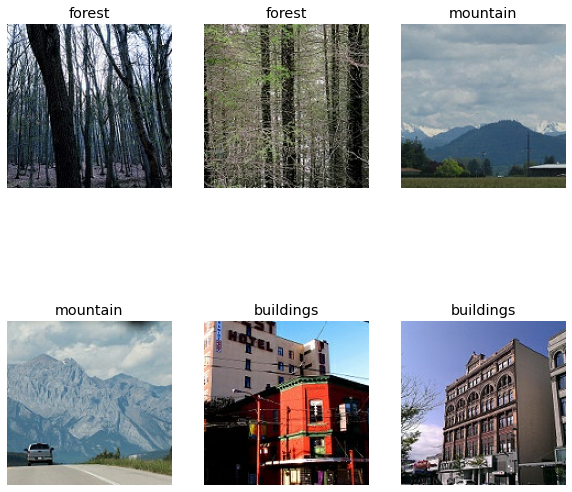

In [67]:
#Ploting some of images

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [68]:
#Checking size of images
for image, cap in train_ds.take(1):
    print(image.shape)
    print(cap.shape)
    break

#Checking size of images
for image, cap in val_ds.take(1):
    print(image.shape)
    print(cap.shape)
    break

(128, 150, 150, 3)
(128,)
(128, 150, 150, 3)
(128,)


**3- CNN**

In [56]:
#Applying convulution filters, pooling, flattening and activation 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #1st layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #2nd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #3rd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #4th layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')                                                       
])


In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 conv2d_37 (Conv2D)          (None, 146, 146, 16)      2320      
                                                                 
 conv2d_38 (Conv2D)          (None, 144, 144, 16)      2320      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 72, 72, 16)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 72, 72, 16)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 70, 70, 32)        4640      
                                                      

In [58]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# import h5py

In [25]:
# erl_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
# mod_chk = ModelCheckpoint(filepath='/kaggle/working/my_model.hdf5', monitor='val_loss', save_best_only=True)
# lr_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

In [59]:
hist = model.fit(train_ds, shuffle=True, epochs=20, validation_data=val_ds, verbose=1)

Epoch 1/20
110/110 [==============================] - 28s 223ms/step - loss: 1.4440 - accuracy: 0.3836 - val_loss: 1.1504 - val_accuracy: 0.5567
Epoch 2/20
110/110 [==============================] - 23s 201ms/step - loss: 1.0557 - accuracy: 0.5593 - val_loss: 0.9826 - val_accuracy: 0.5890
Epoch 3/20
110/110 [==============================] - 23s 204ms/step - loss: 0.9462 - accuracy: 0.6132 - val_loss: 0.8697 - val_accuracy: 0.6337
Epoch 4/20
110/110 [==============================] - 23s 203ms/step - loss: 0.8469 - accuracy: 0.6700 - val_loss: 0.7686 - val_accuracy: 0.7030
Epoch 5/20
110/110 [==============================] - 23s 203ms/step - loss: 0.7560 - accuracy: 0.7148 - val_loss: 0.7451 - val_accuracy: 0.7450
Epoch 6/20
110/110 [==============================] - 23s 205ms/step - loss: 0.6844 - accuracy: 0.7463 - val_loss: 0.6804 - val_accuracy: 0.7387
Epoch 7/20
110/110 [==============================] - 23s 205ms/step - loss: 0.6331 - accuracy: 0.7668 - val_loss: 0.6269 - val_ac

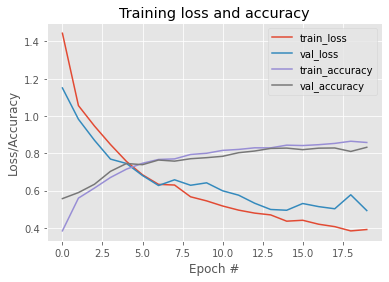

In [60]:
#Plotting losses and accuracy 
#'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['val_loss'], label='val_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.plot(N, hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [61]:
#Evaluating the model
acc = model.evaluate(val_ds, steps=len(val_ds), verbose=1)
print('%.2f'%(acc[1]*100))

24/24 [==============================] - 3s 86ms/step - loss: 0.4925 - accuracy: 0.8320
83.20


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

#Confusion Matrix and Classification Report
Y_pred = model.predict(val_ds)
model.evaluate(val_ds)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_ds.class_names, y_pred))
print('Classification Report')
target_names = ['buildings','forest','glacier','mountain','sea','street']
print(classification_report(val_ds.classes, y_pred, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
#Plot Confusion Metrics
sns.heatmap(confusion_matrix(val_ds.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
plt.show()